# Hand Evaluation using XGBoost Algorithm

Using the dataset 'truco_training_data.csv' the idea is to first do some EDA and then train a XGBoost model to predict the winner of the round given the three cards.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('truco_training_data.csv')
df.head()

,game_seed,hand_number,player_id,agent_player,agent_opponent,dealer_id,mano_id,is_dealer,is_mano,card1_id,...,has_two_same_suit,envido_points,tie_probability_card1,stronger_count_card1,tie_probability_card2,stronger_count_card2,tie_probability_card3,stronger_count_card3,points_gained,won_hand
0,2746317213,18,0,RandomAgent,RandomAgent,1,0,0,1,11,...,1,20,0.076923,18,0.025641,12,0.076923,14,3,1
1,2746317213,18,1,RandomAgent,RandomAgent,1,0,1,0,37,...,1,21,0.025641,12,0.076923,22,0.076923,36,0,0
2,1181241943,18,0,RandomAgent,RandomAgent,1,0,0,1,16,...,1,32,0.076923,36,0.076923,32,0.025641,26,0,0
3,1181241943,18,1,RandomAgent,RandomAgent,1,0,1,0,35,...,1,23,0.076923,18,0.076923,4,0.076923,18,5,1
4,958682846,14,0,RandomAgent,RandomAgent,1,0,0,1,30,...,0,32,0.076923,28,0.076923,28,0.076923,28,0,0


In [3]:
def count_high_cards(row):
    high_cards = 0
    if row['strength1'] > 7:
        high_cards += 1
    if row['strength2'] > 7:
        high_cards += 1
    if row['strength3'] > 7:
        high_cards += 1
    return high_cards
df['high_cards'] = df.apply(count_high_cards, axis=1)
df.head()

,game_seed,hand_number,player_id,agent_player,agent_opponent,dealer_id,mano_id,is_dealer,is_mano,card1_id,...,envido_points,tie_probability_card1,stronger_count_card1,tie_probability_card2,stronger_count_card2,tie_probability_card3,stronger_count_card3,points_gained,won_hand,high_cards
0,2746317213,18,0,RandomAgent,RandomAgent,1,0,0,1,11,...,20,0.076923,18,0.025641,12,0.076923,14,3,1,1
1,2746317213,18,1,RandomAgent,RandomAgent,1,0,1,0,37,...,21,0.025641,12,0.076923,22,0.076923,36,0,0,1
2,1181241943,18,0,RandomAgent,RandomAgent,1,0,0,1,16,...,32,0.076923,36,0.076923,32,0.025641,26,0,0,0
3,1181241943,18,1,RandomAgent,RandomAgent,1,0,1,0,35,...,23,0.076923,18,0.076923,4,0.076923,18,5,1,1
4,958682846,14,0,RandomAgent,RandomAgent,1,0,0,1,30,...,32,0.076923,28,0.076923,28,0.076923,28,0,0,0


In [4]:
df['winner'] = df['won_hand'].replace({1: True, 0: False})
df.head()

,game_seed,hand_number,player_id,agent_player,agent_opponent,dealer_id,mano_id,is_dealer,is_mano,card1_id,...,tie_probability_card1,stronger_count_card1,tie_probability_card2,stronger_count_card2,tie_probability_card3,stronger_count_card3,points_gained,won_hand,high_cards,winner
0,2746317213,18,0,RandomAgent,RandomAgent,1,0,0,1,11,...,0.076923,18,0.025641,12,0.076923,14,3,1,1,True
1,2746317213,18,1,RandomAgent,RandomAgent,1,0,1,0,37,...,0.025641,12,0.076923,22,0.076923,36,0,0,1,False
2,1181241943,18,0,RandomAgent,RandomAgent,1,0,0,1,16,...,0.076923,36,0.076923,32,0.025641,26,0,0,0,False
3,1181241943,18,1,RandomAgent,RandomAgent,1,0,1,0,35,...,0.076923,18,0.076923,4,0.076923,18,5,1,1,True
4,958682846,14,0,RandomAgent,RandomAgent,1,0,0,1,30,...,0.076923,28,0.076923,28,0.076923,28,0,0,0,False


In [5]:
def agent_winner(row):
    if row['winner'] == True and row['player_id'] == 0:
        return row['agent_player']
    elif row['winner'] == True and row['player_id'] == 1:
        return row['agent_opponent']
    else:
        return None

df['agent_winner'] = df.apply(agent_winner, axis=1)
df.head()

,game_seed,hand_number,player_id,agent_player,agent_opponent,dealer_id,mano_id,is_dealer,is_mano,card1_id,...,stronger_count_card1,tie_probability_card2,stronger_count_card2,tie_probability_card3,stronger_count_card3,points_gained,won_hand,high_cards,winner,agent_winner
0,2746317213,18,0,RandomAgent,RandomAgent,1,0,0,1,11,...,18,0.025641,12,0.076923,14,3,1,1,True,RandomAgent
1,2746317213,18,1,RandomAgent,RandomAgent,1,0,1,0,37,...,12,0.076923,22,0.076923,36,0,0,1,False,None
2,1181241943,18,0,RandomAgent,RandomAgent,1,0,0,1,16,...,36,0.076923,32,0.025641,26,0,0,0,False,None
3,1181241943,18,1,RandomAgent,RandomAgent,1,0,1,0,35,...,18,0.076923,4,0.076923,18,5,1,1,True,RandomAgent
4,958682846,14,0,RandomAgent,RandomAgent,1,0,0,1,30,...,28,0.076923,28,0.076923,28,0,0,0,False,None


In [6]:
df.shape

(900000, 36)

In [7]:
df.isnull().sum()

game_seed                       0
hand_number                     0
player_id                       0
agent_player                    0
agent_opponent                  0
dealer_id                       0
mano_id                         0
is_dealer                       0
is_mano                         0
card1_id                        0
card2_id                        0
card3_id                        0
card1_str                       0
card2_str                       0
card3_str                       0
strength1                       0
strength2                       0
strength3                       0
strength_sum                    0
strength_max                    0
starting_score_player           0
starting_score_opponent         0
num_same_suit                   0
has_two_same_suit               0
envido_points                   0
tie_probability_card1           0
stronger_count_card1            0
tie_probability_card2           0
stronger_count_card2            0
tie_probabilit

In [8]:
df.dtypes

game_seed                    int64
hand_number                  int64
player_id                    int64
agent_player                object
agent_opponent              object
dealer_id                    int64
mano_id                      int64
is_dealer                    int64
is_mano                      int64
card1_id                     int64
card2_id                     int64
card3_id                     int64
card1_str                   object
card2_str                   object
card3_str                   object
strength1                    int64
strength2                    int64
strength3                    int64
strength_sum                 int64
strength_max                 int64
starting_score_player        int64
starting_score_opponent      int64
num_same_suit                int64
has_two_same_suit            int64
envido_points                int64
tie_probability_card1      float64
stronger_count_card1         int64
tie_probability_card2      float64
stronger_count_card2

In [9]:
df.columns

Index(['game_seed', 'hand_number', 'player_id', 'agent_player',
       'agent_opponent', 'dealer_id', 'mano_id', 'is_dealer', 'is_mano',
       'card1_id', 'card2_id', 'card3_id', 'card1_str', 'card2_str',
       'card3_str', 'strength1', 'strength2', 'strength3', 'strength_sum',
       'strength_max', 'starting_score_player', 'starting_score_opponent',
       'num_same_suit', 'has_two_same_suit', 'envido_points',
       'tie_probability_card1', 'stronger_count_card1',
       'tie_probability_card2', 'stronger_count_card2',
       'tie_probability_card3', 'stronger_count_card3', 'points_gained',
       'won_hand', 'high_cards', 'winner', 'agent_winner'],
      dtype='object')

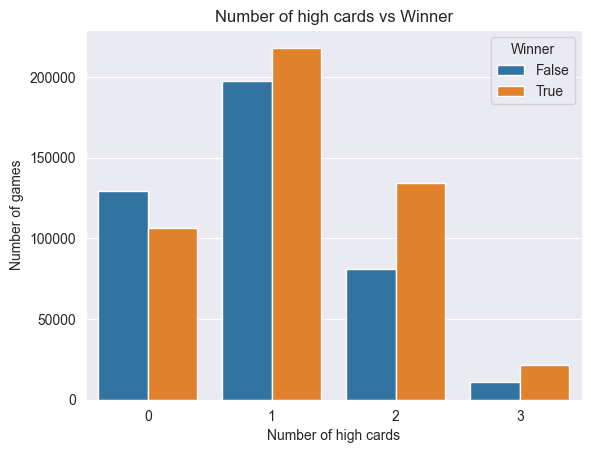

In [10]:
sns.countplot(x='high_cards', hue='winner', data=df)
plt.title('Number of high cards vs Winner')
plt.xlabel('Number of high cards')
plt.ylabel('Number of games')
plt.legend(title='Winner', loc='upper right')
plt.show()

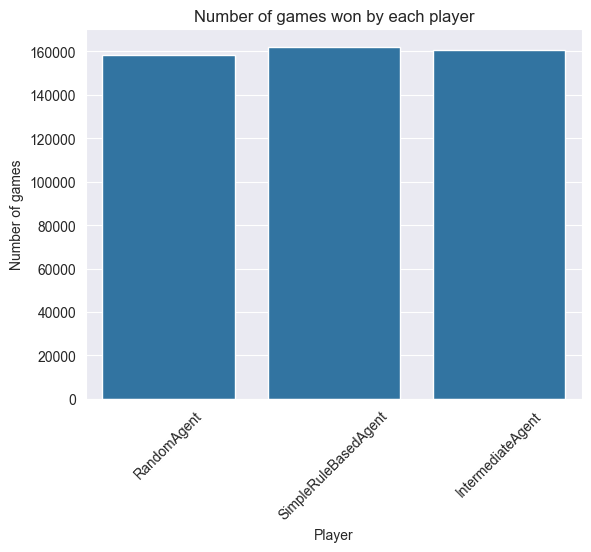

In [11]:
sns.countplot(x='agent_winner', data=df)
plt.title('Number of games won by each player')
plt.xlabel('Player')
plt.ylabel('Number of games')
plt.xticks(rotation=45)
plt.show()

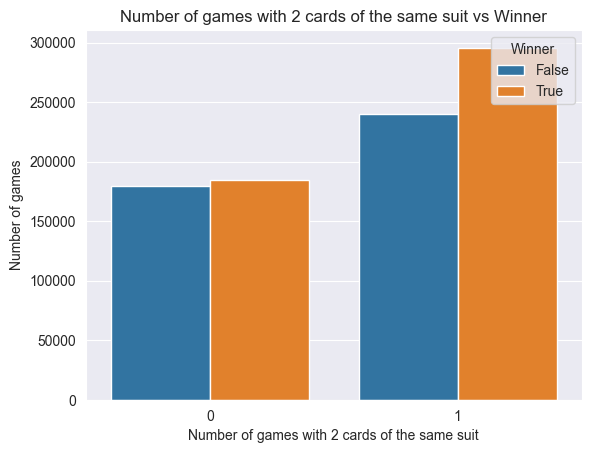

In [12]:
sns.countplot(x='has_two_same_suit', hue='winner', data=df)
plt.title('Number of games with 2 cards of the same suit vs Winner')
plt.xlabel('Number of games with 2 cards of the same suit')
plt.ylabel('Number of games')
plt.legend(title='Winner', loc='upper right')
plt.show()

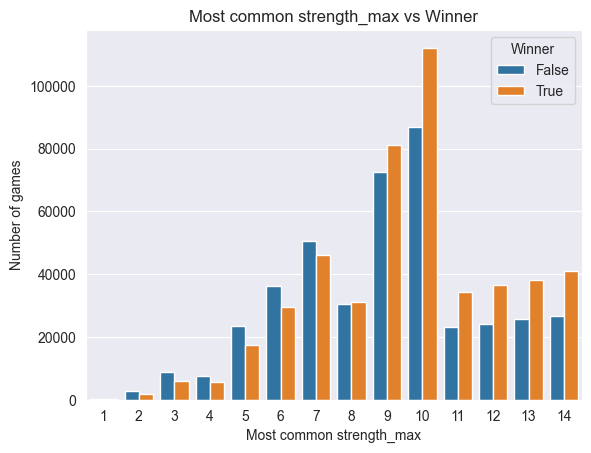

In [13]:
sns.countplot(x='strength_max', hue='winner', data=df)
plt.title('Most common strength_max vs Winner')
plt.xlabel('Most common strength_max')
plt.ylabel('Number of games')
plt.legend(title='Winner', loc='upper right')
plt.show()

Next, the idea is to train a XGBoost model to predict the winner of the round given the three cards. The features will be the three cards and the target will be the winner.

In [14]:
df.drop(['player_id', 'winner', 'agent_player', 'agent_opponent', 'game_seed', 'hand_number', 'card1_str', 'card2_str', 'card3_str', 'agent_winner', 'points_gained'], axis=1, inplace=True)

In [15]:
df.dtypes

dealer_id                    int64
mano_id                      int64
is_dealer                    int64
is_mano                      int64
card1_id                     int64
card2_id                     int64
card3_id                     int64
strength1                    int64
strength2                    int64
strength3                    int64
strength_sum                 int64
strength_max                 int64
starting_score_player        int64
starting_score_opponent      int64
num_same_suit                int64
has_two_same_suit            int64
envido_points                int64
tie_probability_card1      float64
stronger_count_card1         int64
tie_probability_card2      float64
stronger_count_card2         int64
tie_probability_card3      float64
stronger_count_card3         int64
won_hand                     int64
high_cards                   int64
dtype: object

In [16]:
df.head()

,dealer_id,mano_id,is_dealer,is_mano,card1_id,card2_id,card3_id,strength1,strength2,strength3,...,has_two_same_suit,envido_points,tie_probability_card1,stronger_count_card1,tie_probability_card2,stronger_count_card2,tie_probability_card3,stronger_count_card3,won_hand,high_cards
0,1,0,0,1,11,25,12,6,8,7,...,1,20,0.076923,18,0.025641,12,0.076923,14,1,1
1,1,0,1,0,37,46,28,8,5,1,...,1,21,0.025641,12,0.076923,22,0.076923,36,0,1
2,1,0,0,1,16,17,19,1,2,4,...,1,32,0.076923,36,0.076923,32,0.025641,26,0,0
3,1,0,1,0,35,27,47,6,10,6,...,1,23,0.076923,18,0.076923,4,0.076923,18,1,1
4,1,0,0,1,30,18,42,3,3,3,...,0,32,0.076923,28,0.076923,28,0.076923,28,0,0


In [17]:
df.columns

Index(['dealer_id', 'mano_id', 'is_dealer', 'is_mano', 'card1_id', 'card2_id',
       'card3_id', 'strength1', 'strength2', 'strength3', 'strength_sum',
       'strength_max', 'starting_score_player', 'starting_score_opponent',
       'num_same_suit', 'has_two_same_suit', 'envido_points',
       'tie_probability_card1', 'stronger_count_card1',
       'tie_probability_card2', 'stronger_count_card2',
       'tie_probability_card3', 'stronger_count_card3', 'won_hand',
       'high_cards'],
      dtype='object')

In [18]:
df.shape

(900000, 25)

In [19]:
X = df.drop('won_hand', axis=1)
y = df['won_hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [21]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1,
    'alpha': 0,
    'scale_pos_weight': 1,
    'seed': 42
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [22]:
y_pred = bst.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

Accuracy: 0.9351388888888889
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     83914
           1       0.97      0.91      0.94     96086

    accuracy                           0.94    180000
   macro avg       0.94      0.94      0.94    180000
weighted avg       0.94      0.94      0.94    180000



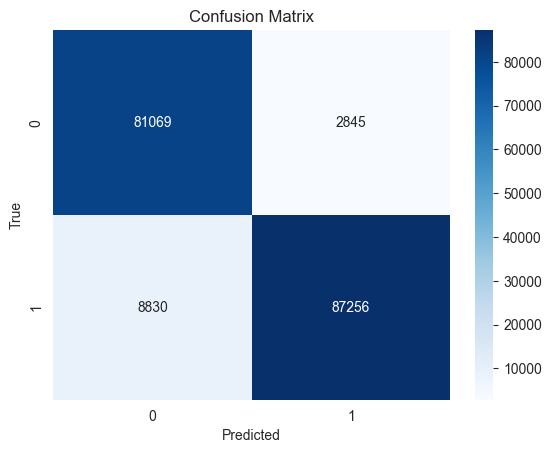

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

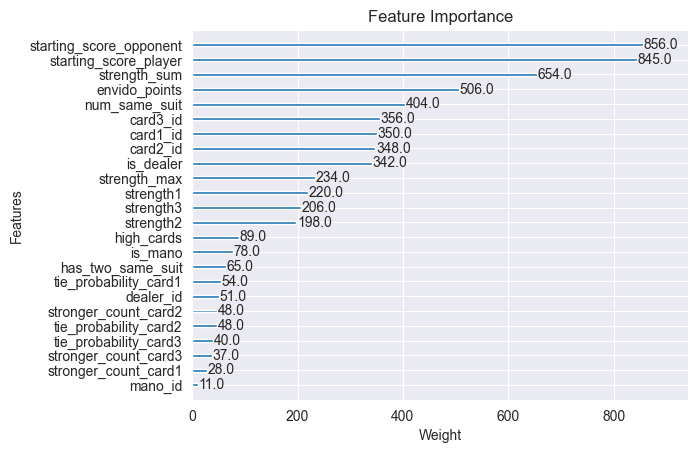

In [24]:
xgb.plot_importance(bst, importance_type='weight')
plt.title('Feature Importance')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.show()

In [25]:
df.drop(['starting_score_player', 'starting_score_opponent'], axis=1, inplace=True)

X = df.drop('won_hand', axis=1)
y = df['won_hand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [27]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1,
    'alpha': 0,
    'scale_pos_weight': 1,
    'seed': 42
}
num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [28]:
y_pred = bst.predict(dtest)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

Accuracy: 0.58995
              precision    recall  f1-score   support

           0       0.57      0.46      0.51     83914
           1       0.60      0.70      0.65     96086

    accuracy                           0.59    180000
   macro avg       0.59      0.58      0.58    180000
weighted avg       0.59      0.59      0.58    180000



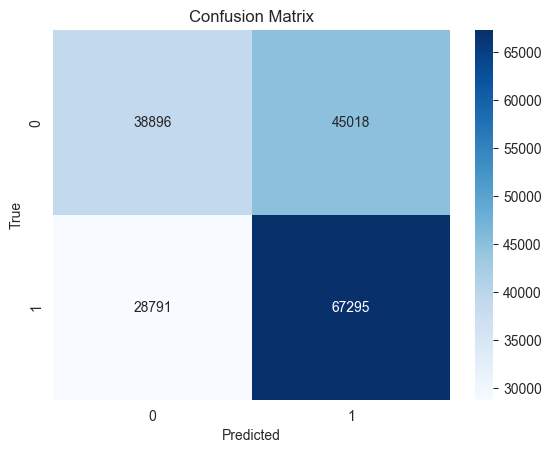

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

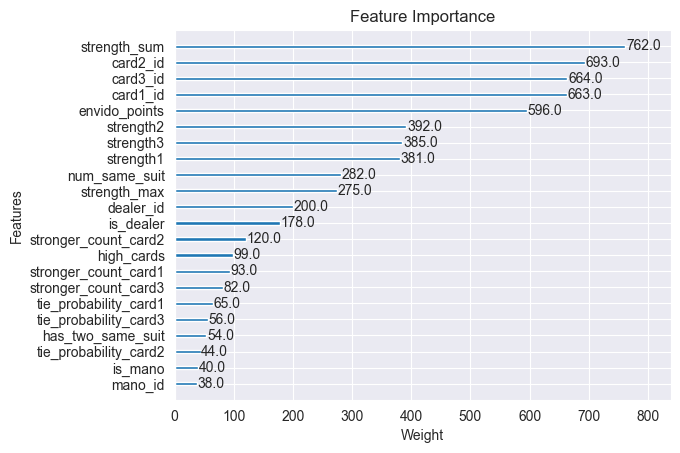

In [30]:
xgb.plot_importance(bst, importance_type='weight')
plt.title('Feature Importance')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.show()